In [17]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [26]:
row = df[['Name', 'Value', 'Wage']][0:]
def to_int(num):
    if '€' in num and "K" in num:
        res = num.strip('€')
        ko = res.strip("K")
        return float(ko)*1000
    if '€' in num and "M" in num:
        res = num.strip('€')
        ko = res.strip("M") 
        return float(ko)*1000000


val = df['Value'].apply(to_int)
wag = df['Wage'].apply(to_int)
row['Value'] = val
row['Wage'] = wag
row["diff"] = row['Value'] - row['Wage']
row.sort_values('diff', ascending=False)

,Name,Value,Wage,diff
2,Neymar Jr,118500000.0,290000.0,118210000.0
0,L. Messi,110500000.0,565000.0,109935000.0
4,K. De Bruyne,102000000.0,355000.0,101645000.0
5,E. Hazard,93000000.0,340000.0,92660000.0
15,P. Dybala,89000000.0,205000.0,88795000.0
...,...,...,...,...
17539,C. Singh,NaN,NaN,NaN
17672,R. Kawai,NaN,1000.0,NaN
17726,T. Warner,NaN,1000.0,NaN
17752,S. Phillips,NaN,1000.0,NaN


<AxesSubplot:xlabel='Wage', ylabel='Value'>

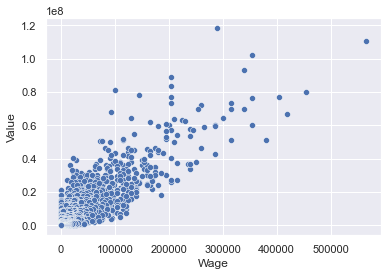

In [27]:
import seaborn as sns
sns.set()

graph  = sns.scatterplot(x="Wage", y='Value', data=row)
graph

In [1]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool as ht
tt = ht(tooltips=[
       ('index', '@index'),
       ("(Wage, Value)", "(@Wage, @Value)"),
       ('Name', '@Name')]
       )

grp = figure(title='football 2019', x_axis_label='Wage', y_axis_label="Value", plot_width=800, plot_height=800, tools=[tt])
grp.circle('Wage', 'Value', size=10, source=row)
show(grp)

NameError: name 'row' is not defined